In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import  OrdinalEncoder
from sklearn.tree  import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

In [24]:
def wrangle(db_path):
   

    # Read query results into DataFrame
    df = pd.read_csv(db_path)
    cols_drop=[]
    
   
 
    # Drop   columns 
    df.drop(columns=cols_drop,inplace=True)

    
    return df

In [25]:
df=wrangle('HR_comma_sep.csv')

## Split

In [26]:
target = "left"
X = df.drop('left',axis=1)
y = df[target]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y , test_size=0.2,random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11999, 9)
y_train shape: (11999,)
X_test shape: (3000, 9)
y_test shape: (3000,)


In [28]:
X_train, X_val, y_train, y_val = train_test_split(
X_train,y_train , test_size=0.2,random_state=42
)

## Build Model

In [29]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.76


In [30]:
# Build Model
model = make_pipeline(
OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=6,random_state=42)
)
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Department', 'salary'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Department',
                                          'data_type': dtype('O'),
                                          'mapping': marketing       1
technical       2
management      3
sales           4
IT              5
support         6
hr              7
product_mng     8
RandD           9
accounting     10
NaN            -2
dtype: int64},
                                         {'col': 'salary',
                                          'data_type': dtyp...
                                return_df=True, verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion=

In [31]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.98
Validation Accuracy: 0.98


In [32]:
tree_depth = model.named_steps['decisiontreeclassifier'].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 6


## Evaluate

In [33]:
test_acc = model.score(X_test,y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.97


## Communicate

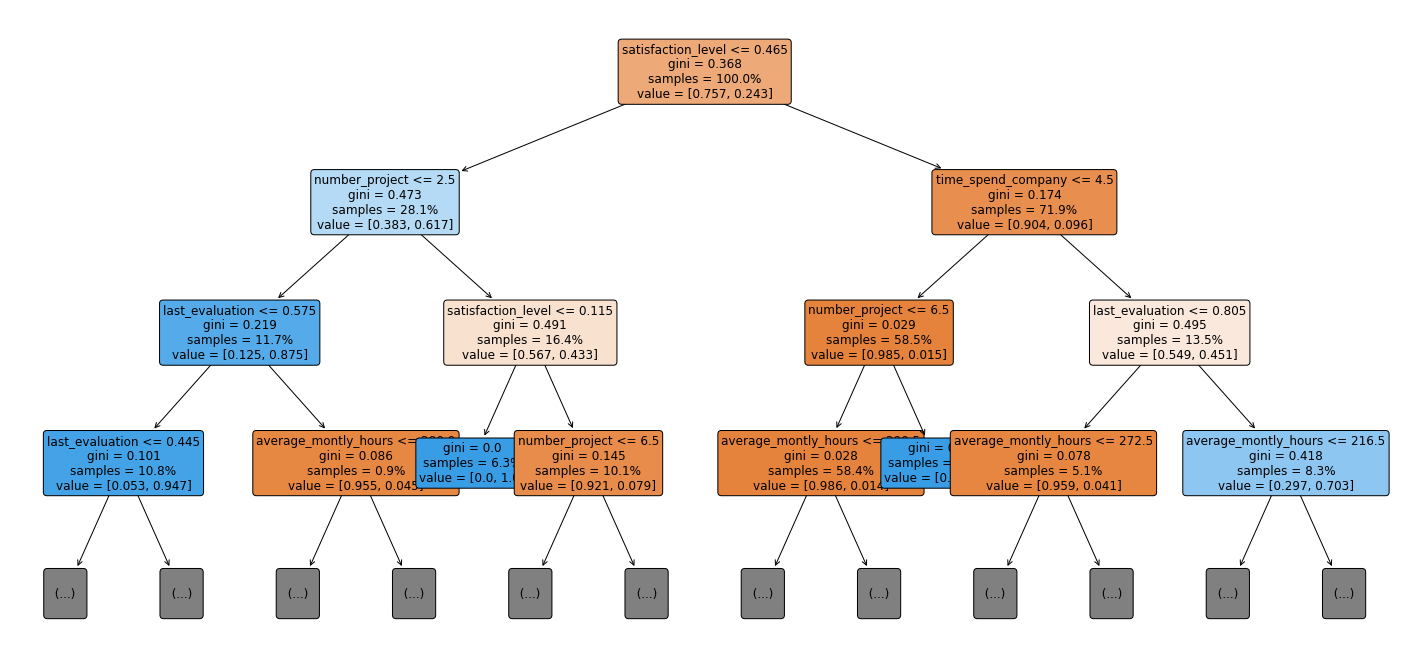

In [34]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps['decisiontreeclassifier'],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 6 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [35]:
features = X_train.columns
importances = model.named_steps['decisiontreeclassifier'].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['satisfaction_level', 'last_evaluation', 'number_project'], dtype='object')
Importances: [0.55907295 0.1451727  0.09010779]


In [36]:
feat_imp = pd.Series(importances,index=features).sort_values()
feat_imp.head()

Work_accident            0.000000
promotion_last_5years    0.000000
salary                   0.000235
Department               0.000397
average_montly_hours     0.067538
dtype: float64

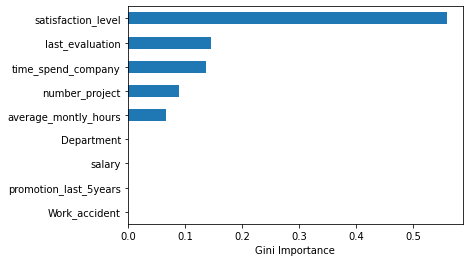

In [37]:
# Create horizontal bar chart
feat_imp.plot(kind='barh',xlabel="Gini Importance");